In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [2]:
breast = pd.read_csv('/Users/jeandre/DataScience874/PostBlockAssignment2/breast_cancer_dataset.csv')

In [3]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Question 1

1.1 Scatter plot showing radius_mean and perimeter_mean

<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>

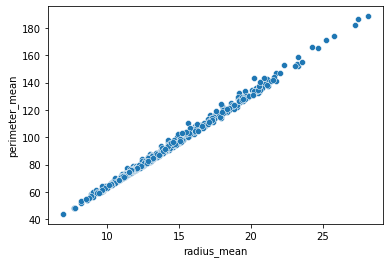

In [4]:
sns.scatterplot(data=breast, x="radius_mean", y="perimeter_mean")

1.2 There is a strong positive correleation between radius_mean and perimeter_mean. There is almost no deviation to a straight line relationship between the two.

1.3 the correlation value for the radius and mean below:

In [5]:
breast['radius_mean'].corr(breast['perimeter_mean'])

0.9978552814938109

A value of 0.997 is very close to 1 and therefore confirms the previous observation made from the graph that the two features have a strong postive correlation.

1.4 Training KNN using 70% training set and values of k = [3, 7, 15, 31, 61]

In [6]:
X = breast[list(breast.columns[2:32])]
Y = breast["diagnosis"]

values = {'B':1, 'M':0}
Y = Y.map(values)

In [7]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
k_list = [3,7,15,31,61]

In [9]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [10]:
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,Y_train)
    print("Accuracy for k =", k)
    print(neigh.score(X_test,Y_test))

Accuracy for k = 3
0.9181286549707602
Accuracy for k = 7
0.9532163742690059
Accuracy for k = 15
0.9649122807017544
Accuracy for k = 31
0.9532163742690059
Accuracy for k = 61
0.9298245614035088


# Question 2

In [11]:
wine = pd.read_csv('/Users/jeandre/DataScience874/PostBlockAssignment2/wine-composition-dataset.csv')

In [12]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2.1

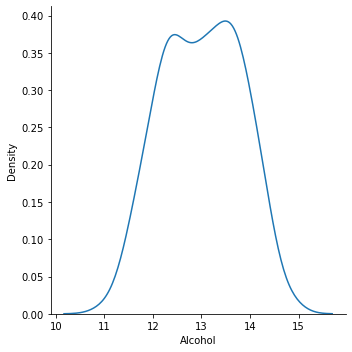

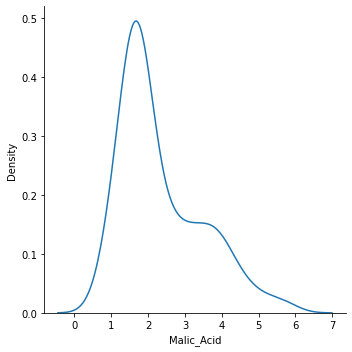

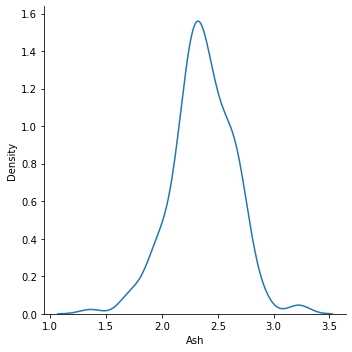

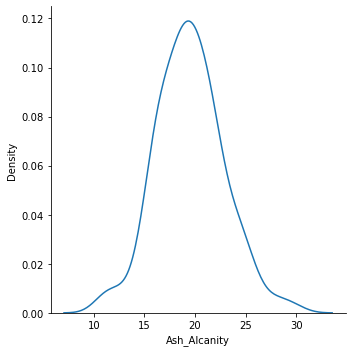

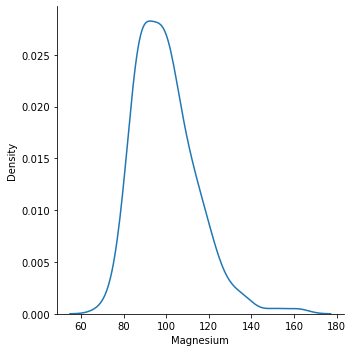

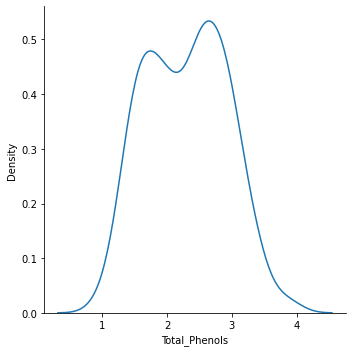

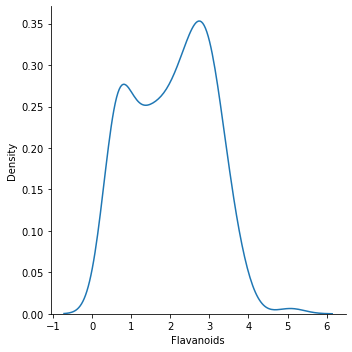

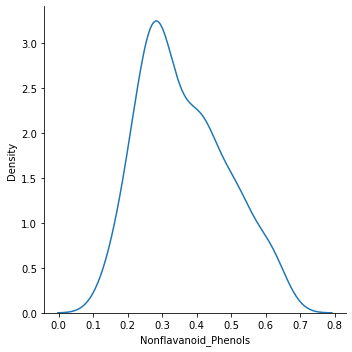

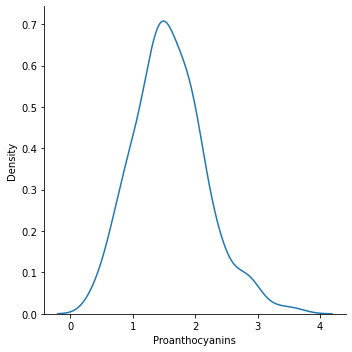

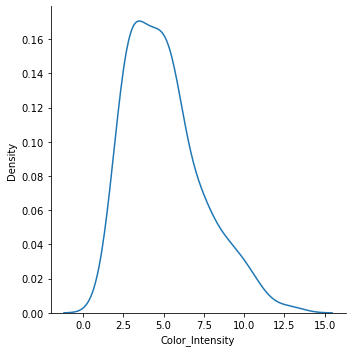

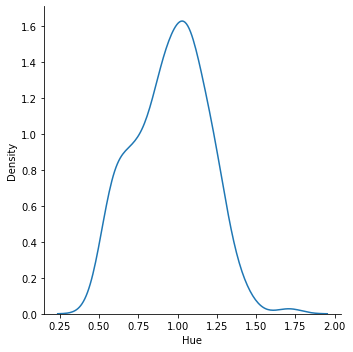

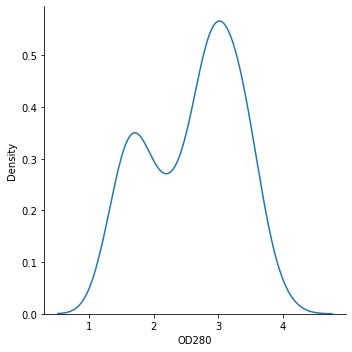

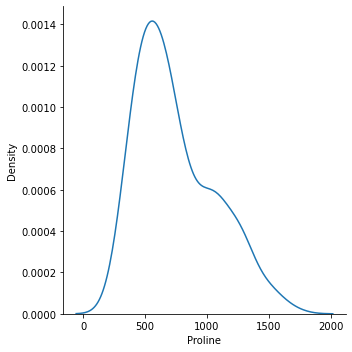

In [13]:
columns = ["Alcohol","Malic_Acid","Ash","Ash_Alcanity","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols",
           "Proanthocyanins","Color_Intensity","Hue","OD280","Proline"]
for column in columns:
    sns.displot(data = wine, x = column, kind = "kde" )

Plotting the distribution of the features in your datset is important because it helps to identify key distributions such as normal or multimodal distributions that at a glance can show two distinct cases present within one feature. Looking at the distribution can also help quickly identify key trends in the data or any outliers, this can later help to confirm any standard deviation values calculated later on the dataset.

2.2

In [14]:
k_values = [2,3,4,5,6,7]
X = wine[['Alcohol','Magnesium']]
X.head()

,Alcohol,Magnesium
0,14.23,127
1,13.20,100
2,13.16,101
3,14.37,113
4,13.24,118


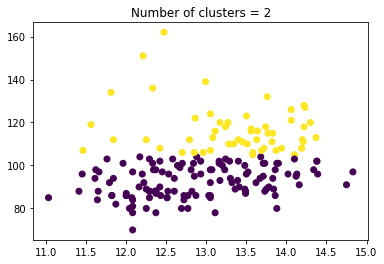

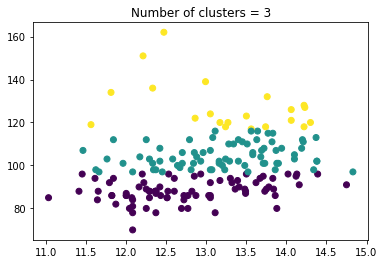

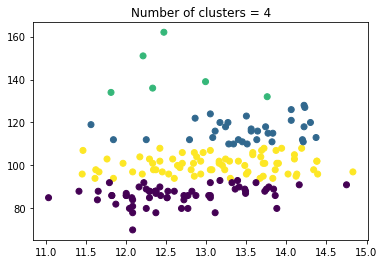

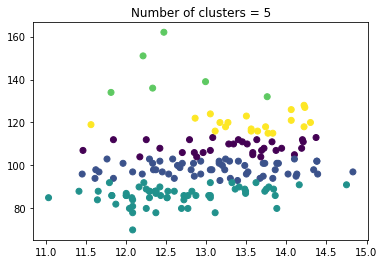

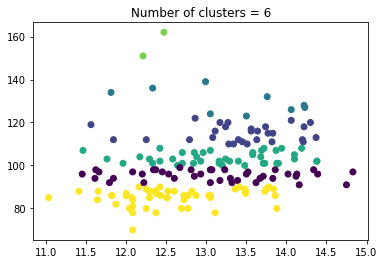

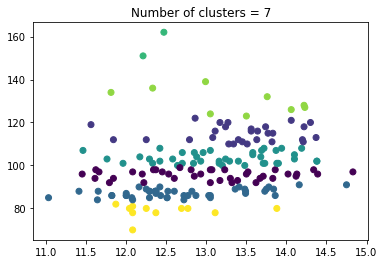

In [15]:
score = []
for k in k_values:
    pred = KMeans(n_clusters=k, random_state=40)
    cluster = pred.fit_predict(X)
    score.append(pred.fit(X).inertia_)
    plt.scatter(X['Alcohol'], X['Magnesium'], c=cluster)
    plt.title("Number of clusters = %i"%k )
    plt.show()

Judging the above plots the clusters become very entangled and without meaning towards the higher k values but there is good separation and distinction at K values of 3 and 4. K = 4 looks slightly better than 3 and will be the value of choice.

2.3

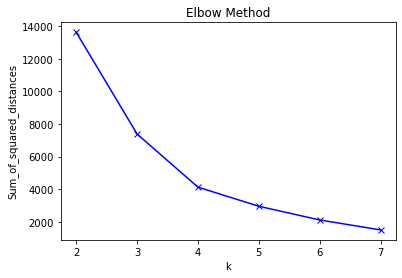

In [16]:
plt.plot(k_values, score, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

# Question 3

In [17]:
admission = pd.read_csv('/Users/jeandre/DataScience874/PostBlockAssignment2/admission_predict.csv')

In [18]:
admission.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [19]:
X = admission[list(admission.columns[1:8])]
X.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [20]:
Y = admission['Chance of Admit']
Y.head(2)

0    0.92
1    0.76
Name: Chance of Admit, dtype: float64

In [21]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [22]:
reg = LinearRegression().fit(X_train, Y_train)
score = reg.score(X_test,Y_test)
print(score)

0.7355078738145215


In [23]:

record1 = np.array([[322, 109, 5, 4.5, 3.5, 8.80, 0]])
record2 = np.array([[307, 52, 5, 4.4, 3.5, 8.20, 2]])

In [24]:
print(reg.predict(record1))
print(reg.predict(record2))

[0.75784394]
[0.58930783]


Based on the input data the linear regression model derives a line of best fit that best matches the X and Y variables given. The algortihm is then given an X to predict and uses the line of best fit y=mx+b to predict what the value of Y should be from input X.

# Question 4

In [25]:
iris = pd.read_csv('/Users/jeandre/DataScience874/PostBlockAssignment2/iris_dataset.csv')

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
X = iris[list(iris.columns[0:-1])]
Y = iris['species']
labels = iris['species'].unique()
labels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.2, random_state = 0)

## KNN

In [29]:
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,Y_train)
K_pred = neigh.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,K_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,K_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,K_pred,average='weighted'))

Accuracy score = 0.9666666666666667
Precision score = 0.9714285714285714
Recall =  0.9666666666666667


## Decision tree

In [30]:
tree = tree.DecisionTreeClassifier()
tree = tree.fit(X_train, Y_train)
D_pred = tree.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,D_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,D_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,D_pred,average='weighted'))
sklearn.metrics.confusion_matrix(Y_test,D_pred)

Accuracy score = 1.0
Precision score = 1.0
Recall =  1.0


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

## Gausian Naive Bayes

In [31]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
N_pred = nb.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,N_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,N_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,N_pred,average='weighted'))
sklearn.metrics.confusion_matrix(Y_test,N_pred)

Accuracy score = 0.9666666666666667
Precision score = 0.9690476190476189
Recall =  0.9666666666666667


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

plotting the raw array above to validate the output of the plot below:

Naive bayes has a slightly lower performance than the other two models here because decision trees have a tendency to overfit the data and do much better with a large amount of data than with a small dataset. Here we have a relatively small dataset and makes it easy for the decision tree to overfit. Naive Bayes is a more robust method when it comes to lower amounts of data and wont overfit as easily.

Naive bayes operates based on probabilities rather than a distance metric such as KNN, using a larger dataset will be a better way to judge the performance of the three models.

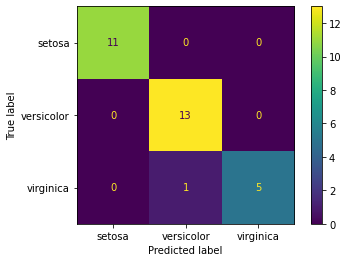

In [32]:
sklearn.metrics.plot_confusion_matrix(nb,X_test,Y_test,display_labels=labels)

A confusion matrix is always important to analyse after a classification process as it is not just a single valyue evaluating the performance of the model. Instead it offers a more detailed view at the classification process. It helps to see if the model is confusing one class with another or if it has poor performance over the whole class set or just has issues with one particular class. This makes the confusion matrix invaluable when it comes to diagnosing model performance.